In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

#Regressoors
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from xgboost import XGBRegressor

#PCA
from sklearn.decomposition import RandomizedPCA, PCA
#MDS
from sklearn.manifold import MDS
#SNE
from sklearn.manifold import TSNE

#Train Test Split
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error as MSE


from statsmodels.stats.weightstats import *
from statsmodels.stats.descriptivestats import sign_test
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interact_manual

# Проверка гипотезы
#### Проведем качественное (визуальное) и количественное (метрики качества регрессии) сравнение спектров Исходных и Продифференцированных, с целью убедиться что основным источником информации является форма линии спектров

## 1) Исходные спектры

In [216]:
Data = pd.read_csv('20190318.txt', sep=' ')
Data = Data.iloc[:1024,4:-1].T
Vals = Data.iloc[0,:].values
Data.iloc[0,:] = map(lambda x : int(x), Vals)
Data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
Spectrum1,80,62,61,28,25,55,44,32,45,47,...,921,913,879,893,893,852,868,865,869,874
Spectrum2,47,27,73,56,33,57,46,26,52,76,...,928,909,921,933,907,896,910,868,922,908
Spectrum3,63,47,49,37,62,13,24,48,60,46,...,934,940,929,946,968,909,960,914,939,953
Spectrum4,64,33,76,40,49,54,39,22,33,45,...,966,976,965,964,959,950,957,922,931,962
Spectrum5,38,55,79,53,86,64,47,42,28,17,...,886,864,894,882,886,869,868,851,878,867
Spectrum6,77,51,40,48,46,54,49,63,51,52,...,819,885,836,839,841,829,859,817,836,828
Spectrum7,38,47,40,56,52,57,45,44,31,65,...,803,812,822,816,821,806,793,785,806,805
Spectrum8,93,39,33,43,58,21,55,54,64,32,...,800,814,780,791,819,790,799,791,775,783
Spectrum9,61,53,56,55,30,47,51,52,36,48,...,794,780,761,770,764,777,778,728,760,774
Spectrum10,50,37,71,45,43,38,67,54,63,42,...,749,757,735,742,731,745,729,755,748,762


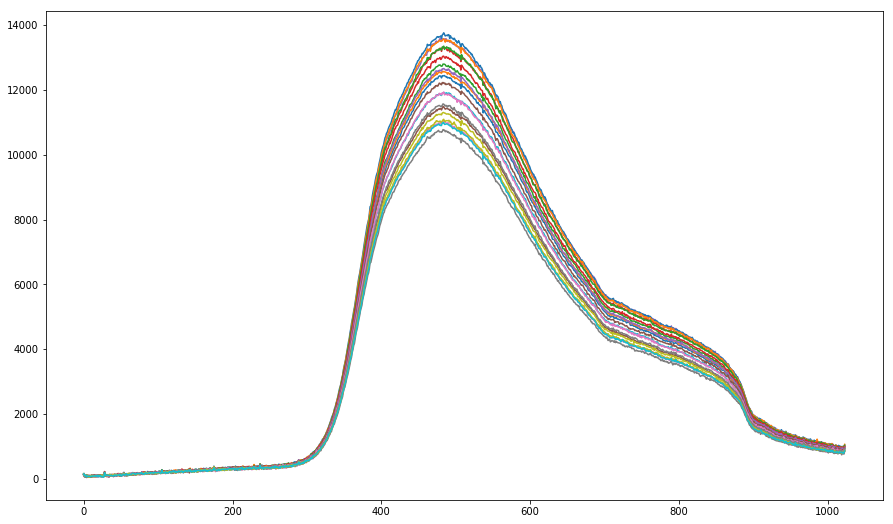

In [217]:
plt.figure(figsize=(15,9))
for i in range(20,40):
    plt.plot(range(Data.shape[1]) , Data.iloc[i,:].values)

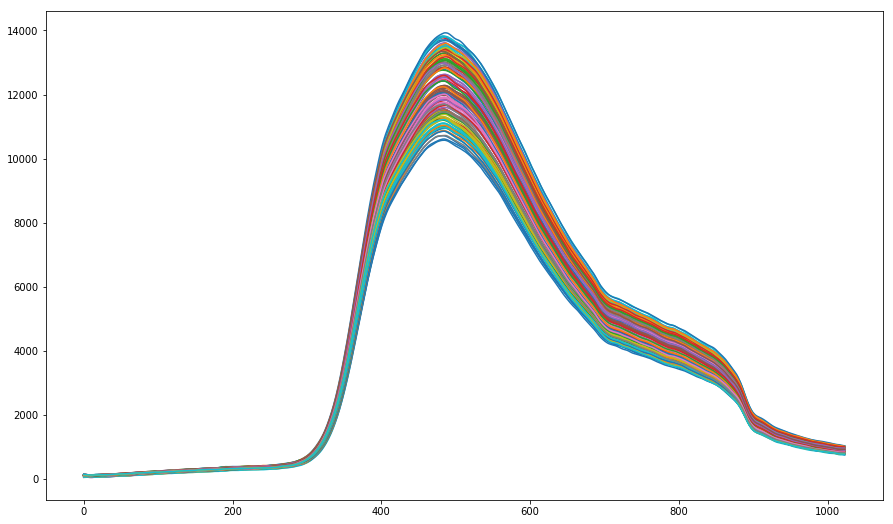

In [218]:
data_lowess_1 = list()
plt.figure(figsize=(15,9))
for i in range(Data.shape[0]) :
    x = range(Data.shape[1])
    y = Data.iloc[i].values
    lowess = sm.nonparametric.lowess(y, x, frac=0.015)
    plt.plot(lowess[:,0], lowess[:,1])
    data_lowess_1.append(lowess[:,1])

lowess_df = pd.DataFrame(np.array(data_lowess_1))

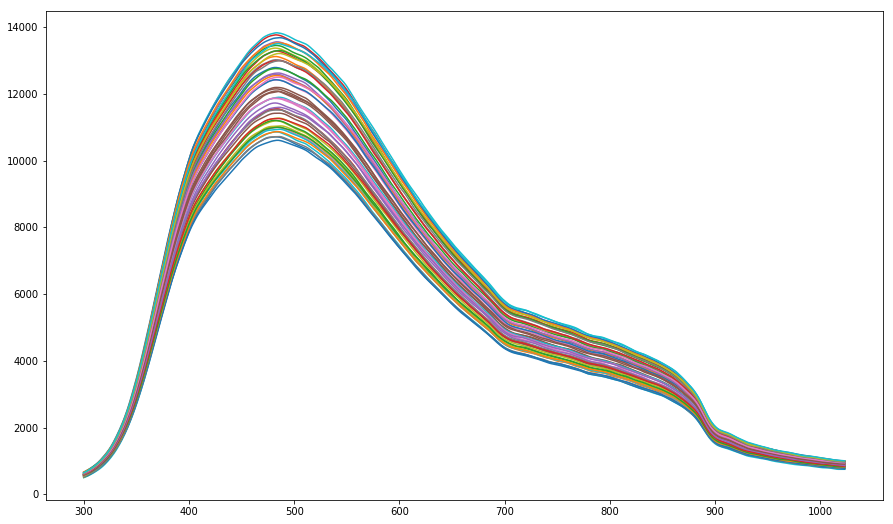

In [219]:
scaler = MinMaxScaler()
#for i in range(lowess_df.shape[0]):
scaler.fit(lowess_df.T)
scaled_lowess_df = pd.DataFrame(scaler.transform(lowess_df.T)).T

plt.figure(figsize=(15,9))
for i in range(50):
    plt.plot(range(300,1024) ,lowess_df.iloc[i,300:].values)

## 2) Продифференцированные спектры

In [220]:
Diff_Data = lowess_df - lowess_df.shift(axis=1)
Diff_Data.drop(0, axis=1, inplace=True)
Diff_Data.head(10)

,1,2,3,4,5,6,7,8,9,10,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-3.337473,-3.124422,-2.975334,-2.922432,-2.937089,-2.927568,-2.194184,-0.153219,0.956311,1.958838,...,-4.412222,-5.028805,-5.298093,-4.974116,-4.389332,-4.370135,-4.429080,-4.450022,-4.405456,-4.296152
1,0.863356,0.914220,1.030667,1.173359,1.288312,1.334267,1.122140,1.970722,2.339777,2.092804,...,-2.754403,-2.902260,-3.258669,-2.291212,-1.631227,-1.645155,-1.718263,-1.753004,-1.736071,-1.647674
2,-1.268921,-1.099994,-0.948405,-0.818064,-0.702624,-0.662545,-0.414388,1.692203,2.480927,2.785244,...,-1.476812,-0.891171,-0.996697,-0.737332,-0.084878,0.083233,0.110309,0.109994,0.088453,0.100947
3,-1.873197,-1.772953,-1.626020,-1.458266,-1.262687,-1.053733,-0.775248,0.999859,1.592807,1.870950,...,-2.959999,-3.580396,-4.648896,-5.208500,-4.440944,-4.210048,-4.158313,-4.162307,-4.181464,-4.148870
4,-2.762199,-3.000538,-3.134438,-3.177721,-3.128025,-3.092777,-3.898548,-3.981363,-3.008431,-1.333889,...,-2.667262,-2.545798,-2.654224,-2.408895,-1.978125,-1.908942,-1.962532,-2.045564,-2.111356,-2.126068
5,-0.791130,-0.720475,-0.722754,-0.759223,-0.772073,-0.619695,0.194666,1.091176,1.458725,1.195256,...,-3.543560,-3.744324,-4.361889,-3.808180,-3.680868,-3.606631,-3.486576,-3.348133,-3.234324,-3.123847
6,0.858151,0.815043,0.805213,0.849720,0.938017,1.022538,0.839405,0.934359,0.854981,0.994136,...,-4.611139,-5.136884,-5.396519,-3.728480,-2.941004,-2.737054,-2.704970,-2.729327,-2.737167,-2.688400
7,1.262802,1.262144,1.219873,1.178327,1.170252,1.223082,1.534934,1.156213,0.750390,0.544421,...,-3.494154,-3.495457,-3.682807,-3.711823,-3.758649,-3.610643,-3.479563,-3.384415,-3.337775,-3.332344
8,-1.311144,-1.209926,-1.115722,-1.046733,-1.025129,-1.023814,-0.809081,0.355420,0.955339,1.452818,...,-3.305253,-2.454240,-1.979713,-1.766102,-1.462072,-1.350929,-1.287581,-1.259116,-1.261619,-1.245597
9,0.459395,0.425671,0.397477,0.334404,0.223930,0.092053,-0.042265,-0.705262,-0.708899,-1.030075,...,-5.648927,-4.977577,-3.998393,-1.082590,-0.433454,-0.287935,-0.119610,0.086368,0.341871,0.615862


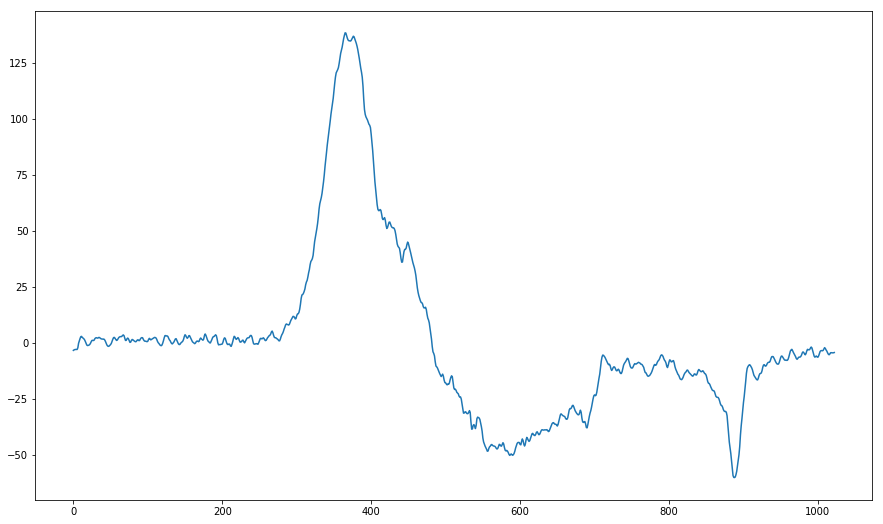

In [221]:
plt.figure(figsize=(15,9))
for i in range(1):
    plt.plot(range(Diff_Data.shape[1]) , Diff_Data.iloc[i,:].values)

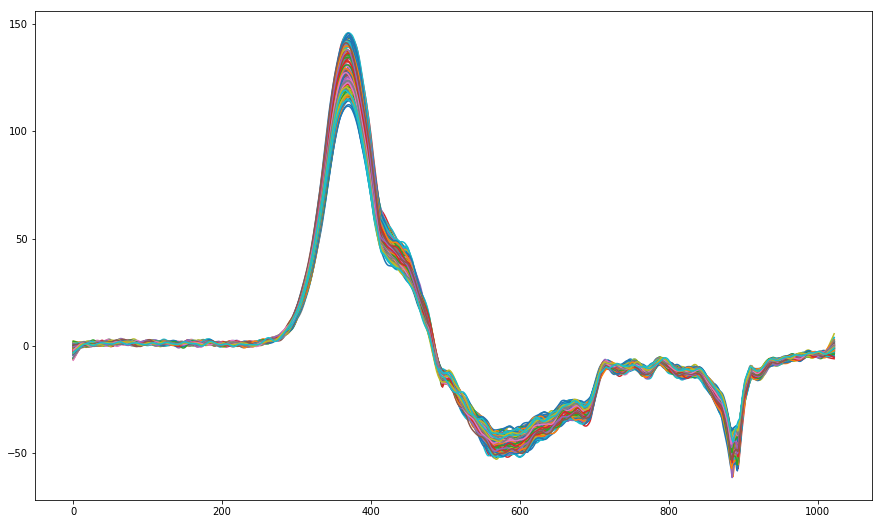

In [222]:
data_lowess_2 = list()
plt.figure(figsize=(15,9))
for i in range(Diff_Data.shape[0]) :
    x = range(Diff_Data.shape[1])
    y = Diff_Data.iloc[i].values
    lowess = sm.nonparametric.lowess(y, x, frac=0.02)
    plt.plot(lowess[:,0], lowess[:,1])
    data_lowess_2.append(lowess[:,1])

lowess_diff_df = pd.DataFrame(np.array(data_lowess_2))

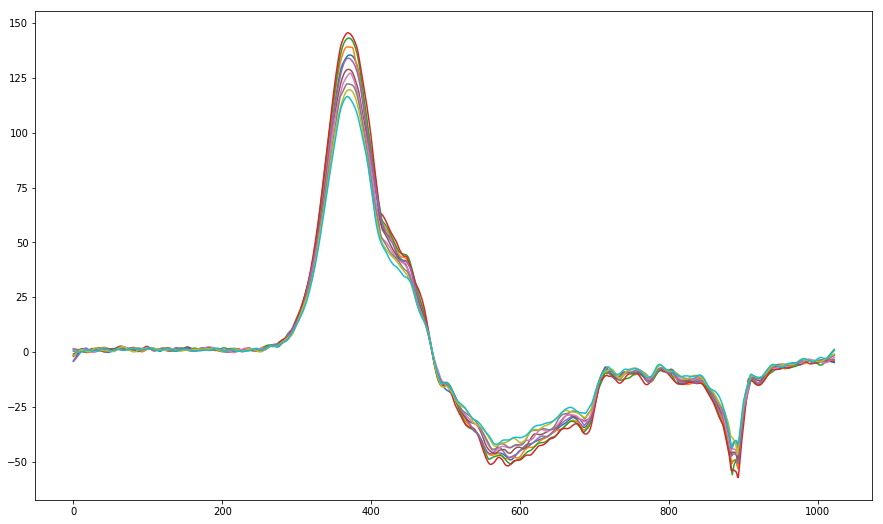

In [223]:
scaler = MinMaxScaler(feature_range=(0,1))
#for i in range(lowess_df.shape[0]):
scaler.fit(lowess_diff_df.T)
scaled_lowess_diff_df = pd.DataFrame(scaler.transform(lowess_diff_df.T)).T

plt.figure(figsize=(15,9))
for i in range(10):
    plt.plot(range(1023) ,lowess_diff_df.iloc[i,:].values)

In [224]:
pH = np.array([3.65]*10+[3.64]*10+[3.63]*10+[3.62]*10+[3.61]*10+[3.60]*10+[3.59]*10+[3.58]*10+[3.56]*10+[3.53]*10+[3.52]*10+[3.50]*10+[3.48]*10)
lowess_df['pH'] = pH
lowess_diff_df['pH'] = pH
scaled_lowess_df['pH'] = pH
scaled_lowess_diff_df['pH'] = pH

## PCA для исходных спектров

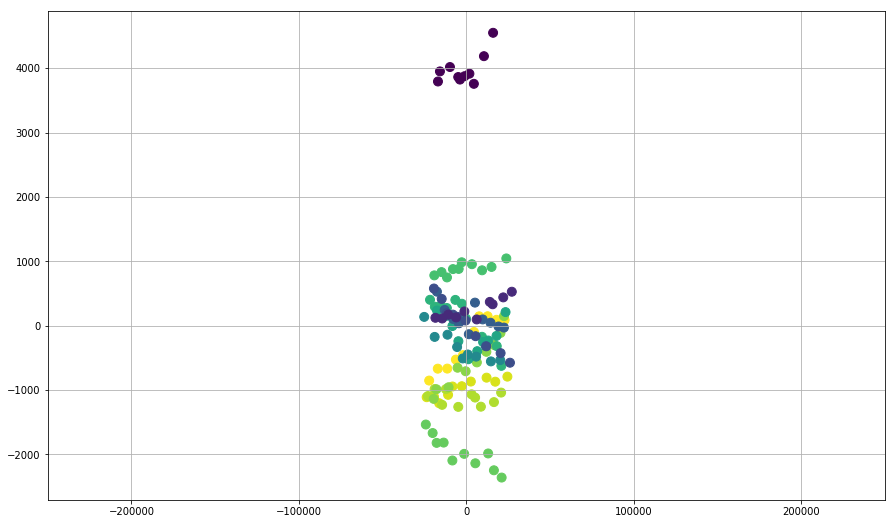

In [245]:
pca_model = PCA(n_components=3)
pca_data = pd.DataFrame(pca_model.fit_transform(lowess_df.drop('pH', axis=1)))
pca_data['pH'] = lowess_df.pH.values

plt.figure(figsize=(15,9))
plt.scatter(pca_data.iloc[:,0], pca_data.iloc[:,1], c=pca_data.pH.values[:], s=80)
plt.xlim(-250000,250000)
#plt.ylim(-0.2,0.2)
plt.grid()

## PCA для продифференцированных спектров

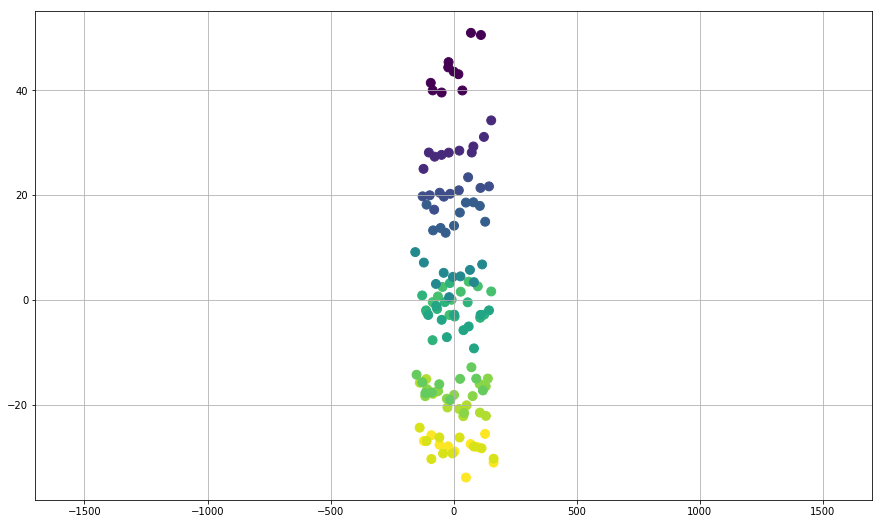

In [246]:
pca_model = PCA(n_components=3)
pca_diff_data = pd.DataFrame(pca_model.fit_transform(lowess_diff_df.drop('pH', axis=1).iloc[:,300:]))
pca_diff_data['pH'] = lowess_diff_df.pH.values

plt.figure(figsize=(15,9))
plt.scatter(pca_diff_data.iloc[:,0], pca_diff_data.iloc[:,1], c=pca_diff_data.pH.values[:], s=80)
plt.xlim(-1700,1700)
#plt.ylim(-0.2,0.2)
plt.grid()

## Регрессия
### 1) Случайные выборки исходных спектров

Test Data :  [3.65 3.52 3.48 3.48 3.58 3.62 3.52 3.63 3.59 3.5  3.64 3.62 3.63 3.65
 3.65 3.65 3.64 3.56 3.6  3.59 3.6  3.59 3.58 3.5  3.52 3.63 3.53 3.48
 3.62 3.61 3.64 3.62 3.52 3.63 3.65 3.48 3.5  3.59 3.58]
Predictions :  [3.65 3.52 3.48 3.48 3.58 3.62 3.52 3.63 3.58 3.52 3.64 3.62 3.63 3.65
 3.65 3.65 3.64 3.55 3.6  3.6  3.6  3.58 3.57 3.51 3.5  3.63 3.55 3.48
 3.62 3.61 3.64 3.62 3.52 3.63 3.65 3.48 3.5  3.56 3.59]
Delta :  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.01 -0.02  0.    0.
  0.    0.    0.    0.    0.    0.01  0.   -0.01  0.    0.01  0.01 -0.01
  0.02  0.   -0.02  0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.03 -0.01]
Mean Squared Error :  0.008473185457363214


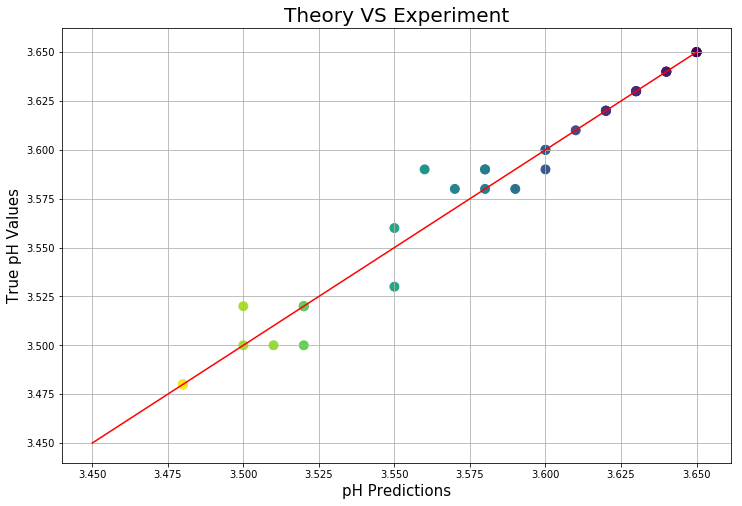

In [247]:
train_data, test_data, train_target, test_target = train_test_split(pca_data.drop('pH', axis=1), pca_data.pH,
                                                                   test_size=0.3, random_state=123)

regressor = GradientBoostingRegressor(learning_rate=0.07) #GradientBoostingRegressor(learning_rate=0.07) #LinearRegression()
regressor.fit(train_data, train_target)
preds = regressor.predict(test_data)
 
print 'Test Data : ', test_target.values
print 'Predictions : ', preds.round(2)
print 'Delta : ', test_target.values - preds.round(2)
print 'Mean Squared Error : ', np.sqrt(MSE(test_target.values, preds.round(2)))

plt.figure(figsize=(12,8))
plt.plot(np.arange(3.45,3.7,0.1), np.arange(3.45,3.7,0.1), c='r')
plt.scatter(preds.round(2) , test_target.values, c=1-(preds-preds.min())/preds.max(), s=80)
plt.xlabel('pH Predictions', fontsize=15)
plt.ylabel('True pH Values', fontsize=15)
plt.title('Theory VS Experiment', fontsize=20)

plt.grid()

In [248]:
mse_array = []
scores = []
for i in range(100):
    train_data, test_data, train_target, test_target = train_test_split(pca_data.drop('pH', axis=1), pca_data.pH,
                                                                   test_size=0.3, random_state=i)

    regressor = GradientBoostingRegressor(learning_rate=0.07) #LinearRegression() #GradientBoostingRegressor(learning_rate=0.07)
    regressor.fit(train_data, train_target)
    preds = regressor.predict(test_data)
    
    mse_array.append(np.sqrt(MSE(test_target.values, preds)).round(6))
    scores.append(regressor.score(test_data, test_target))
    
print 'MSE : ', mse_array[:20]
print 
print 'Corrs : ', scores[:20]
print 
print 'Среднее MSE по 100 случайным выборкам : ', np.sqrt(np.mean(mse_array)).round(4)
print 'Средняя корреляция по 100 случайным выборкам : ', np.mean(scores).round(4)

MSE :  [0.006714, 0.008153, 0.006583, 0.005669, 0.008152, 0.008257, 0.006154, 0.011043, 0.019336, 0.006986, 0.005696, 0.009031, 0.006787, 0.010293, 0.009729, 0.007996, 0.0101, 0.008379, 0.011276, 0.013263]

Corrs :  [0.9830371056008518, 0.9731142291578369, 0.9855398613378953, 0.9898008431531112, 0.9751195379096798, 0.9745534539898272, 0.9853994978524027, 0.958758448949175, 0.8686354010743882, 0.9778924446745927, 0.9883312571992863, 0.9720101128509727, 0.9870346264048286, 0.9558475468573524, 0.9630073394387598, 0.9748811781971719, 0.9654260226560183, 0.9690752832577105, 0.9554196219581546, 0.9400084330859991]

Среднее MSE по 100 случайным выборкам :  0.0956
Средняя корреляция по 100 случайным выборкам :  0.9663


### 2) Случайные выборки продифференцированных спектров

Test Data :  [3.65 3.52 3.48 3.48 3.58 3.62 3.52 3.63 3.59 3.5  3.64 3.62 3.63 3.65
 3.65 3.65 3.64 3.56 3.6  3.59 3.6  3.59 3.58 3.5  3.52 3.63 3.53 3.48
 3.62 3.61 3.64 3.62 3.52 3.63 3.65 3.48 3.5  3.59 3.58]
Predictions :  [3.65 3.52 3.48 3.48 3.59 3.62 3.52 3.63 3.59 3.5  3.64 3.62 3.62 3.64
 3.65 3.65 3.64 3.57 3.6  3.58 3.6  3.58 3.59 3.5  3.52 3.62 3.53 3.48
 3.63 3.61 3.65 3.62 3.52 3.63 3.64 3.48 3.5  3.59 3.58]
Delta :  [ 0.    0.    0.    0.   -0.01  0.    0.    0.    0.    0.    0.    0.
  0.01  0.01  0.    0.    0.   -0.01  0.    0.01  0.    0.01 -0.01  0.
  0.    0.01  0.    0.   -0.01  0.   -0.01  0.    0.    0.    0.01  0.
  0.    0.    0.  ]
Mean Squared Error :  0.00531085004543783


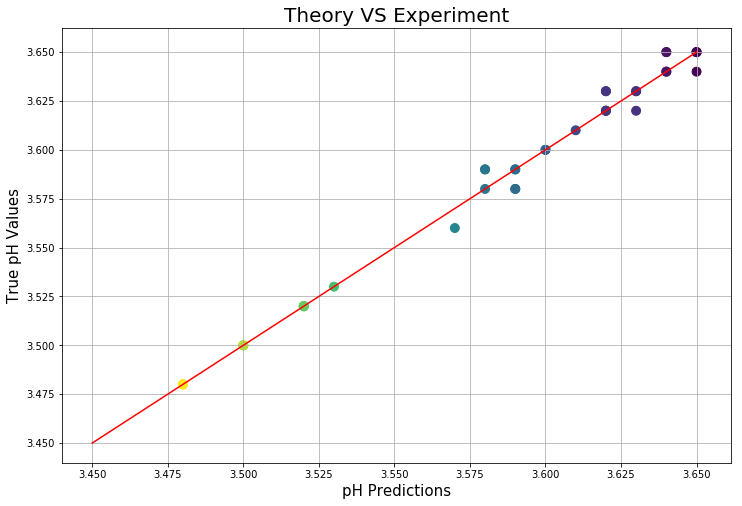

In [249]:
train_data, test_data, train_target, test_target = train_test_split(pca_diff_data.drop('pH', axis=1), pca_diff_data.pH,
                                                                   test_size=0.3, random_state=123)

regressor = GradientBoostingRegressor(learning_rate=0.07) #GradientBoostingRegressor(learning_rate=0.07) #LinearRegression()
regressor.fit(train_data, train_target)
preds = regressor.predict(test_data)
 
print 'Test Data : ', test_target.values
print 'Predictions : ', preds.round(2)
print 'Delta : ', test_target.values - preds.round(2)
print 'Mean Squared Error : ', np.sqrt(MSE(test_target.values, preds.round(2)))

plt.figure(figsize=(12,8))
plt.plot(np.arange(3.45,3.7,0.1), np.arange(3.45,3.7,0.1), c='r')
plt.scatter(preds.round(2) , test_target.values, c=1-(preds-preds.min())/preds.max(), s=80)
plt.xlabel('pH Predictions', fontsize=15)
plt.ylabel('True pH Values', fontsize=15)
plt.title('Theory VS Experiment', fontsize=20)

plt.grid()

In [250]:
mse_diff_array = []
scores_diff = []
for i in range(100):
    train_data, test_data, train_target, test_target = train_test_split(pca_diff_data.drop('pH', axis=1),
                                                                        pca_diff_data.pH,
                                                                   test_size=0.3, random_state=i)

    regressor = GradientBoostingRegressor(learning_rate=0.07) #LinearRegression() #GradientBoostingRegressor(learning_rate=0.07)
    regressor.fit(train_data, train_target)
    preds = regressor.predict(test_data)
    
    mse_diff_array.append(np.sqrt(MSE(test_target.values, preds)).round(6))
    scores_diff.append(regressor.score(test_data, test_target))
    
print 'MSE : ', mse_diff_array[:20]
print 
print 'Corrs : ', scores_diff[:20]
print 
print 'Среднее MSE по 100 случайным выборкам : ', np.sqrt(np.mean(mse_diff_array)).round(4)
print 'Средняя корреляция по 100 случайным выборкам : ', np.mean(scores_diff).round(4)

MSE :  [0.00599, 0.007454, 0.006031, 0.006753, 0.007356, 0.00546, 0.004962, 0.008403, 0.007778, 0.007677, 0.007113, 0.011313, 0.005785, 0.006352, 0.005862, 0.006719, 0.005346, 0.006977, 0.008393, 0.006606]

Corrs :  [0.9864974724747892, 0.977527746367206, 0.9878636236382493, 0.985530585400537, 0.9797387346966826, 0.9888735002337188, 0.9905073684596669, 0.9761196674397096, 0.9787448742157663, 0.9733002421095005, 0.9818051975444003, 0.9560743395218239, 0.9905818470712621, 0.9831841919461631, 0.9865690176482149, 0.9822633905161002, 0.9903125905031555, 0.9785566841388172, 0.9753032142307162, 0.985118163603307]

Среднее MSE по 100 случайным выборкам :  0.0813
Средняя корреляция по 100 случайным выборкам :  0.9835


### Для каждого из случаев (случайных выборок) соберем набор значений MSE и степени корреляции и сравним распределения



In [251]:
scores_df = pd.DataFrame([scores, scores_diff]).T
scores_df.columns = [u'Исходные', u'Продифференцированные']

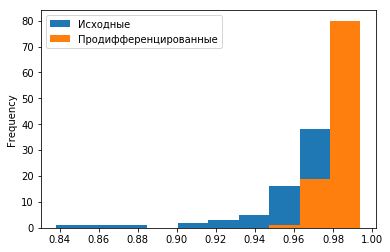

In [252]:
scores_df.plot.hist(bins=10)

In [253]:
mse_df = pd.DataFrame([mse_array, mse_diff_array]).T
mse_df.columns = [u'Исходные', u'Продифференцированные']

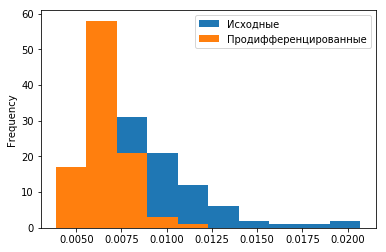

In [254]:
mse_df.plot.hist(bins=10)

#### Визуально оба распределения похожи, и при этом похожи на нормальное. Проверим эти распределения на "нормальность"

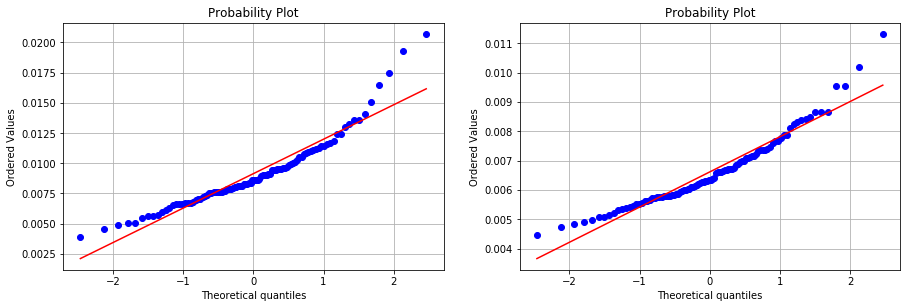

In [255]:
# Для MSE

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
stats.probplot(mse_df.iloc[:,0], dist="norm", plot=plt)
plt.grid()

plt.subplot(2,2,2)
stats.probplot(mse_df.iloc[:,1], dist="norm", plot=plt)
plt.grid()

plt.show()

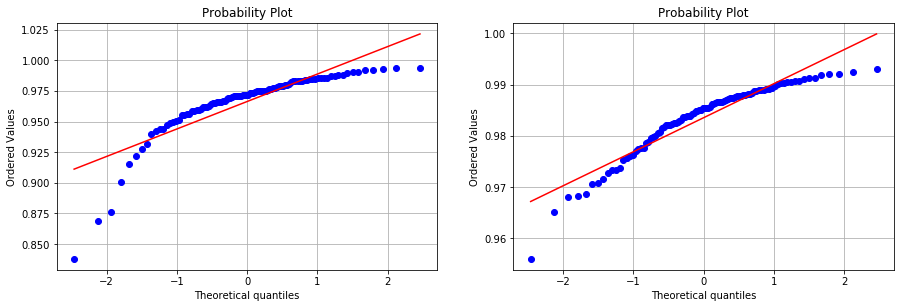

In [256]:
# Для корреляций

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
stats.probplot(scores_df.iloc[:,0], dist="norm", plot=plt)
plt.grid()

plt.subplot(2,2,2)
stats.probplot(scores_df.iloc[:,1], dist="norm", plot=plt)
plt.grid()

plt.show()

#### И посмотрим на формальные тесты

In [257]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(mse_df.iloc[:,0])
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(mse_df.iloc[:,1])

Shapiro-Wilk normality test, W-statistic: 0.908737, p-value: 0.000004
Shapiro-Wilk normality test, W-statistic: 0.935166, p-value: 0.000099


In [258]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(scores_df.iloc[:,0])
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(scores_df.iloc[:,1])

Shapiro-Wilk normality test, W-statistic: 0.754299, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.900666, p-value: 0.000002


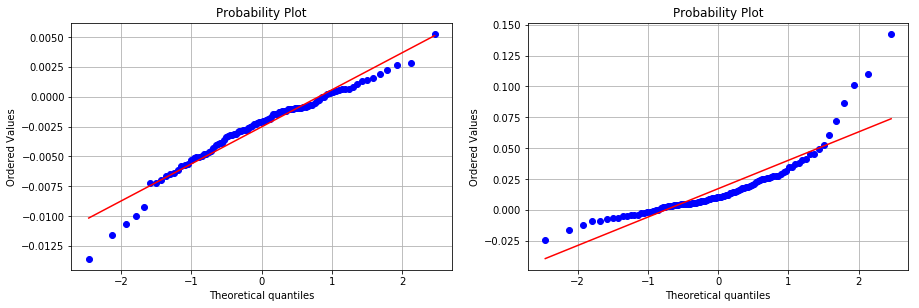

In [259]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
stats.probplot(mse_df.iloc[:,1] - mse_df.iloc[:,0], dist = "norm", plot = plt)
plt.grid()
plt.subplot(2,2,2)
stats.probplot(scores_df.iloc[:,1] - scores_df.iloc[:,0], dist = "norm", plot = plt)
plt.grid()

plt.show()

In [260]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(mse_df.iloc[:,1] - mse_df.iloc[:,0])
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(scores_df.iloc[:,1] - scores_df.iloc[:,0])

Shapiro-Wilk normality test, W-statistic: 0.956006, p-value: 0.002109
Shapiro-Wilk normality test, W-statistic: 0.794251, p-value: 0.000000


In [261]:
print stats.ttest_rel(mse_df.iloc[:,0], mse_df.iloc[:,1])
print stats.ttest_rel(scores_df.iloc[:,0], scores_df.iloc[:,1])

Ttest_relResult(statistic=8.022608327029898, pvalue=2.1470159062877944e-12)
Ttest_relResult(statistic=-6.727053885557775, pvalue=1.1298834536453766e-09)


In [262]:
stats.wilcoxon(mse_df.iloc[:,0], mse_df.iloc[:,1])

WilcoxonResult(statistic=518.0, pvalue=5.174036778840668e-12)